In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("D:\\datas\cardata.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# Load the dataset
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [6]:
# Find the values of the fuel_type column
print(f'Unique value in Index columns: \n{df.Fuel_Type.unique()}')

Unique value in Index columns: 
['Petrol' 'Diesel' 'CNG']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# check the correct name of the columns
df.columns.tolist()

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [9]:
# check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.drop(columns=["Car_Name"] , inplace=True) # Delete Car_Name's column
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
# Maximum year column value plus one
max_year = df['Year'].max()+1

# Subtract the rows of the year column from its maximum value and put them in a new column
df['Age'] = max_year - df['Year']

# Move the 'Age' column to the second position
df.insert(1, "Age", df.pop("Age"))

In [12]:
#check types of each columns
df.dtypes

Year               int64
Age                int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

# plots

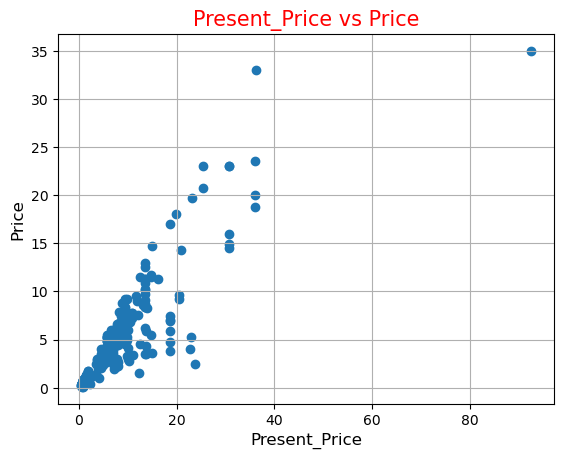

In [13]:
plt.title('Present_Price vs Price' , fontsize=15 , color='red')
plt.scatter(df['Present_Price'] , df['Selling_Price'])
plt.xlabel('Present_Price' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

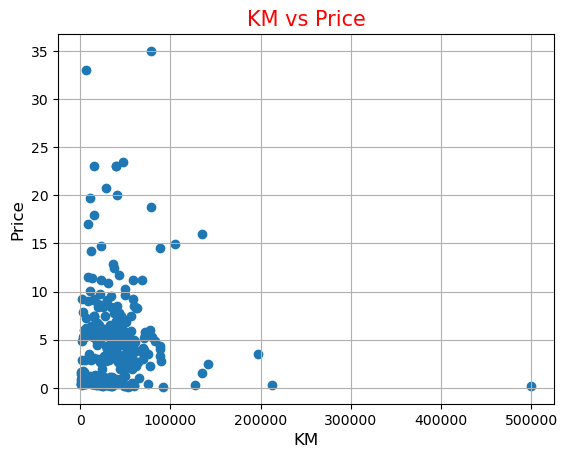

In [14]:
plt.title('KM vs Price' , fontsize=15 , color='red')
plt.scatter(df['Kms_Driven'] , df['Selling_Price'])
plt.xlabel('KM' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

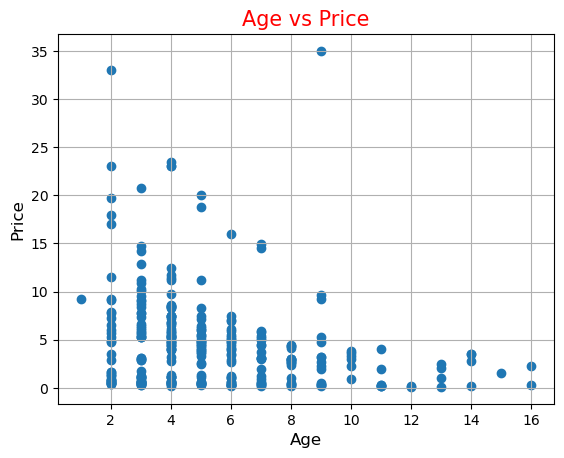

In [15]:
plt.title('Age vs Price' , fontsize=15 , color='red')
plt.scatter(df['Age'] , df['Selling_Price'])
plt.xlabel('Age' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

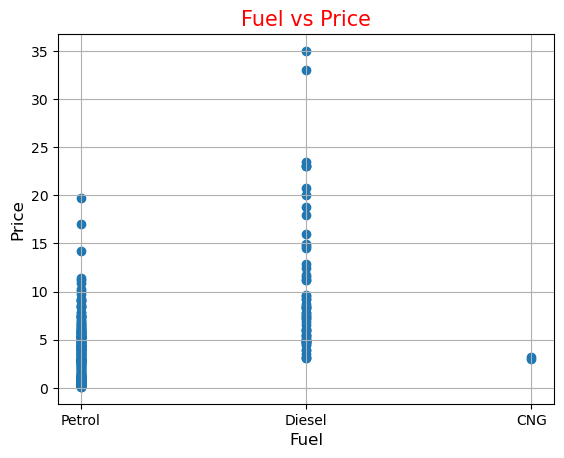

In [16]:
plt.title('Fuel vs Price' , fontsize=15 , color='red')
plt.scatter(df['Fuel_Type'] , df['Selling_Price'])
plt.xlabel('Fuel' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

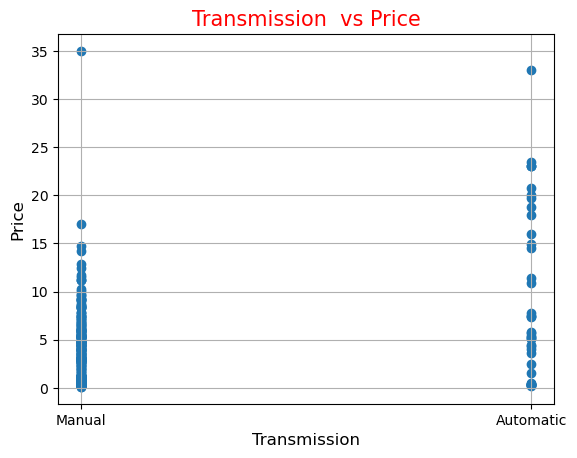

In [17]:
plt.title('Transmission  vs Price' , fontsize=15 , color='red')
plt.scatter(df['Transmission'] , df['Selling_Price'])
plt.xlabel('Transmission' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

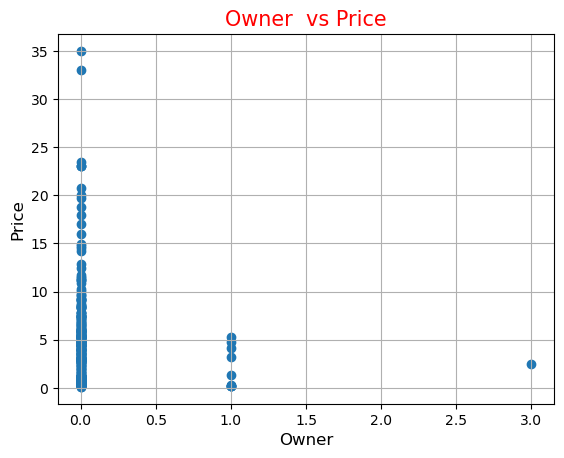

In [18]:
plt.title('Owner  vs Price' , fontsize=15 , color='red')
plt.scatter(df['Owner'] , df['Selling_Price'])
plt.xlabel('Owner' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

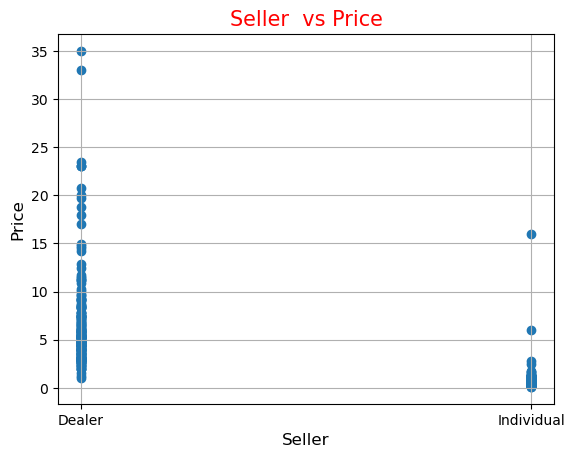

In [19]:
plt.title('Seller  vs Price' , fontsize=15 , color='red')
plt.scatter(df['Seller_Type'] , df['Selling_Price'])
plt.xlabel('Seller' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()


# outlir:

### km = 500000 
### price = 35 and 32 or 33

In [20]:
#See the largest values of Selling_Price's column
df['Selling_Price'].nlargest(10)

86    35.00
64    33.00
63    23.50
51    23.00
82    23.00
93    23.00
96    20.75
59    19.99
66    19.75
62    18.75
Name: Selling_Price, dtype: float64

In [22]:
# Selecting columns less than 35 and 33
df1 = df[df['Selling_Price'] < 30]
df1

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [23]:
df1['Kms_Driven'].nlargest(10)

196    500000
179    213000
84     197176
85     142000
77     135154
53     135000
37     127000
50     104707
200     92233
54      90000
Name: Kms_Driven, dtype: int64

In [24]:
df2 = df1[df1['Kms_Driven'] < 280000]
df2

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [25]:
x = df2[(df2['Seller_Type'] == 'Individual') & (df2['Selling_Price'] > 10)].index
x

Int64Index([53], dtype='int64')

In [26]:
df3 = df2.drop(x)
df3

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


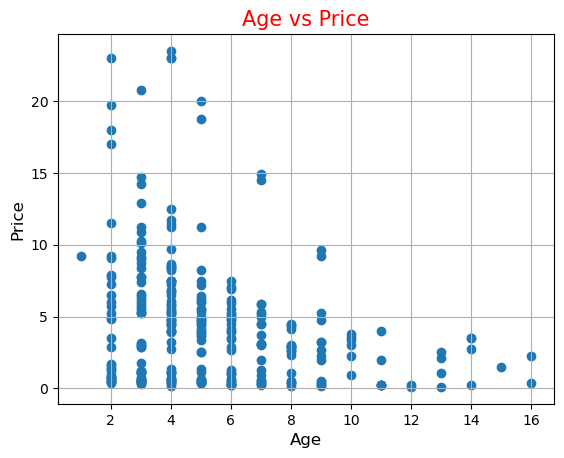

In [27]:
plt.title('Age vs Price' , fontsize=15 , color='red')
plt.scatter(df3['Age'] , df3['Selling_Price'])
plt.xlabel('Age' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

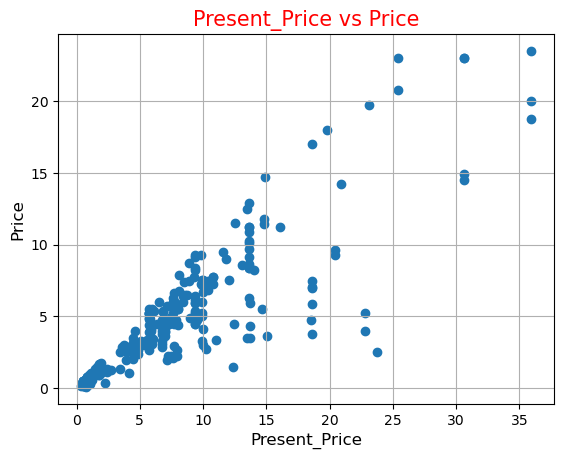

In [28]:
plt.title('Present_Price vs Price' , fontsize=15 , color='red')
plt.scatter(df3['Present_Price'] , df3['Selling_Price'])
plt.xlabel('Present_Price' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

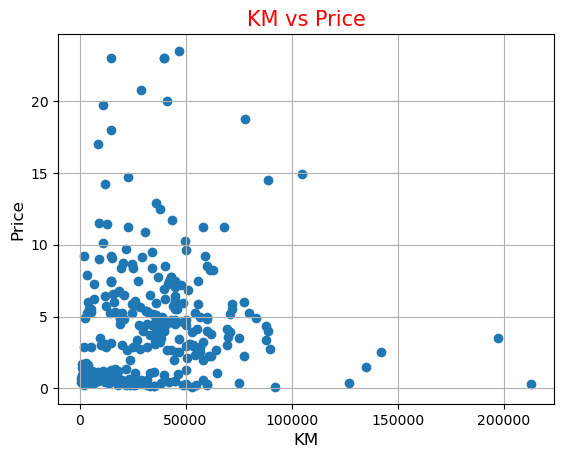

In [29]:
plt.title('KM vs Price' , fontsize=15 , color='red')
plt.scatter(df3['Kms_Driven'] , df3['Selling_Price'])
plt.xlabel('KM' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

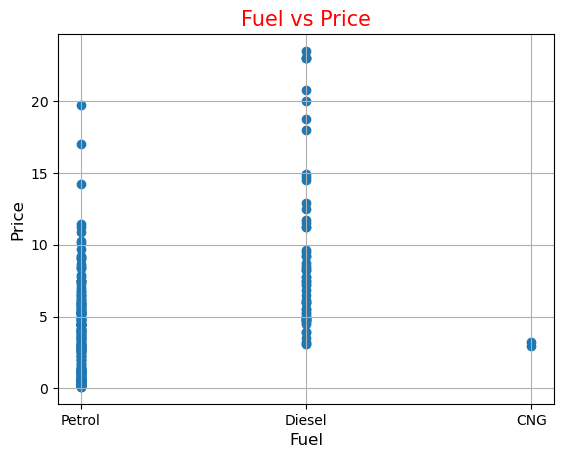

In [30]:
plt.title('Fuel vs Price' , fontsize=15 , color='red')
plt.scatter(df3['Fuel_Type'] , df3['Selling_Price'])
plt.xlabel('Fuel' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

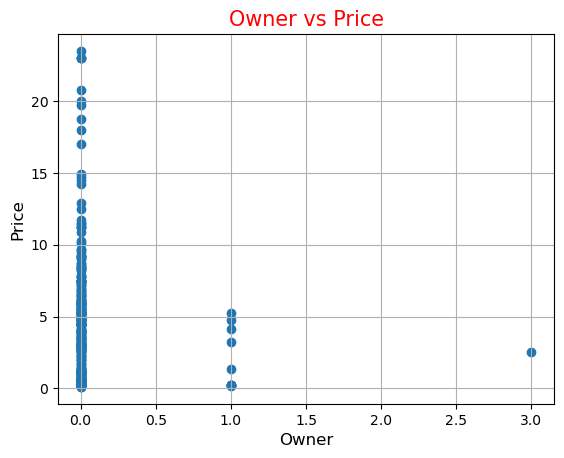

In [31]:
plt.title('Owner vs Price' , fontsize=15 , color='red')
plt.scatter(df3['Owner'] , df3['Selling_Price'])
plt.xlabel('Owner' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

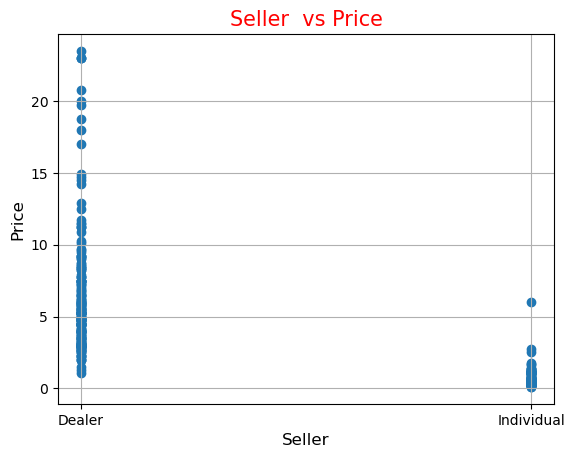

In [32]:
plt.title('Seller  vs Price' , fontsize=15 , color='red')
plt.scatter(df3['Seller_Type'] , df3['Selling_Price'])
plt.xlabel('Seller' , fontsize=12)
plt.ylabel('Price' , fontsize=12)
plt.grid()
plt.show()

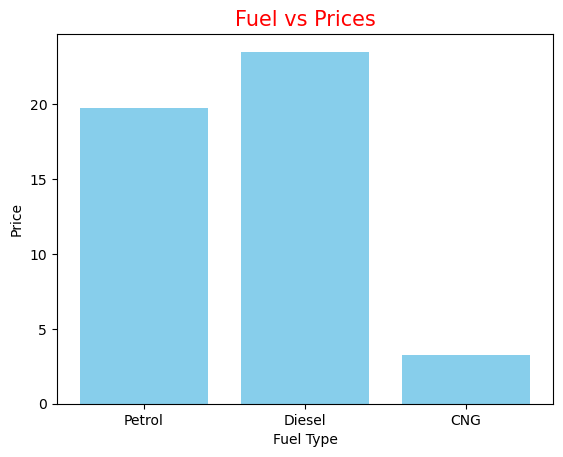

In [33]:
plt.title('Fuel vs Prices' , color='red' , fontsize=15)
plt.bar(df3['Fuel_Type'], df3['Selling_Price'], color='skyblue' )
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

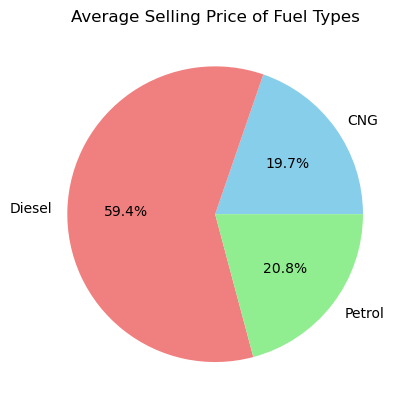

In [34]:
# Group by fuel type and calculate the average price
average_prices = df3.groupby('Fuel_Type')['Selling_Price'].mean()

# Create a pie chart with percentages
plt.pie(average_prices, labels=average_prices.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral','lightgreen'])
plt.title('Average Selling Price of Fuel Types')
plt.show()

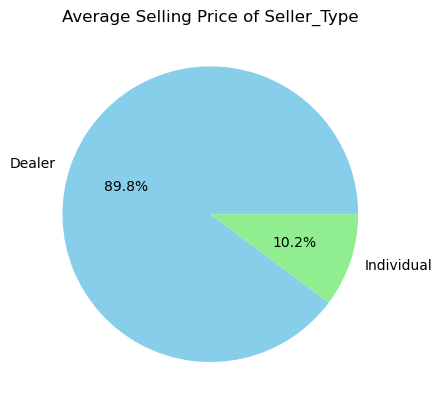

In [37]:
# Group by fuel type and calculate the average price
average_prices = df3.groupby('Seller_Type')['Selling_Price'].mean()

# Create a pie chart with percentages
plt.pie(average_prices, labels=average_prices.index, autopct='%1.1f%%', colors=['skyblue','lightgreen'])
plt.title('Average Selling Price of Seller_Type')
plt.show()

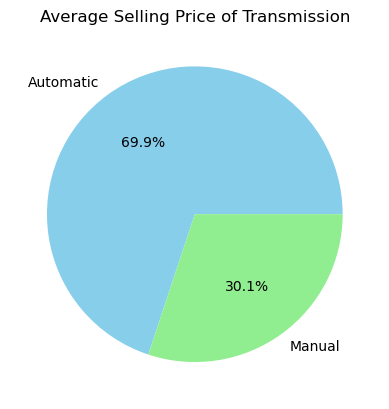

In [38]:
average_prices = df3.groupby('Transmission')['Selling_Price'].mean()

plt.pie(average_prices, labels=average_prices.index, autopct='%1.1f%%', colors=['skyblue','lightgreen'])
plt.title('Average Selling Price of Transmission')
plt.show()

# convert categorical to numerical

In [39]:
#In this function, we have made each of the feature values equal to a series of numbers
def convert_numerical(df):
    Fuel_numeric = {'Petrol': 2, 'Diesel': 3, 'CNG': 4}
    df['Fuel_Type'] = df['Fuel_Type'].replace(Fuel_numeric)
    Seller_numeric = {'Dealer': 2, 'Individual': 3}
    df['Seller_Type'] = df['Seller_Type'].replace(Seller_numeric)
    Transmission_numeric = {'Manual': 2, 'Automatic': 3}
    df['Transmission'] = df['Transmission'].replace(Transmission_numeric)
    return df

In [41]:
convert_numerical(df3)

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5,3.35,5.59,27000,2,2,2,0
1,2013,6,4.75,9.54,43000,3,2,2,0
2,2017,2,7.25,9.85,6900,2,2,2,0
3,2011,8,2.85,4.15,5200,2,2,2,0
4,2014,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988,3,2,2,0
297,2015,4,4.00,5.90,60000,2,2,2,0
298,2009,10,3.35,11.00,87934,2,2,2,0
299,2017,2,11.50,12.50,9000,3,2,2,0


In [42]:
df3.isnull().sum()

Year             0
Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [43]:
#The unique values of Fuel_Type's column
df3['Fuel_Type'].unique()

array([2, 3, 4], dtype=int64)

In [44]:
df3['Seller_Type'].unique()

array([2, 3], dtype=int64)

In [45]:
df3['Transmission'].unique()

array([2, 3], dtype=int64)

In [62]:
X = pd.DataFrame(df3 , columns=[ 'Age',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner'])
Y = df3['Selling_Price'].values.reshape(-1,1)

In [63]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [64]:
regressor = LinearRegression()

In [65]:
regressor.fit(x_train , y_train)

LinearRegression()

In [66]:
result = regressor.score(x_test,y_test)
print(result)

0.879878602880523


In [67]:
kfold_validation = KFold(10 , shuffle=True)

In [68]:
results = cross_val_score(regressor , X , Y , cv=kfold_validation)

In [69]:
print(results)
print(np.mean(results))

[0.84212531 0.63228325 0.83293762 0.857578   0.86673699 0.86753306
 0.73472422 0.85697378 0.92211895 0.91233253]
0.8325343707112303


# correlations

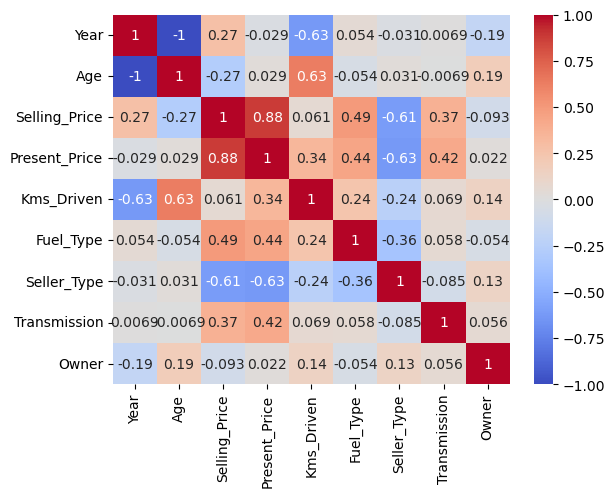

In [96]:
corr_matrix = df3.corr(numeric_only=True)
sns.heatmap(corr_matrix,  cmap='coolwarm' , annot=True)

plt.show()

## Outlier handling by percentile

In [113]:
upper_limit = df3['Kms_Driven'].quantile(0.99)
lower_limit = df3['Kms_Driven'].quantile(0.01)
upper_limit , lower_limit

(135427.84000000014, 1192.0)

<Axes: >

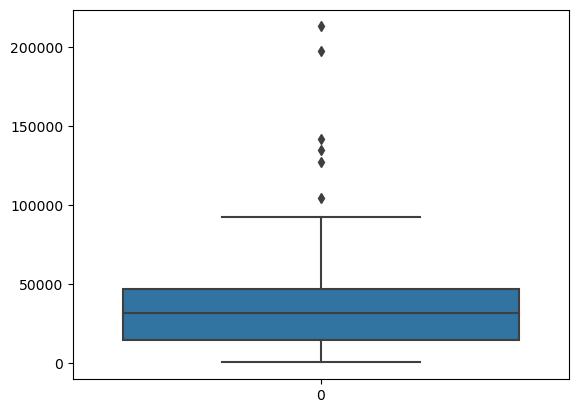

In [114]:
sns.boxplot(df3['Kms_Driven'])

In [115]:
df3['Kms_Driven'].nlargest(5)

179    213000
84     197176
85     142000
77     135154
37     127000
Name: Kms_Driven, dtype: int64

In [116]:
df3.loc[(df3['Kms_Driven'] > upper_limit) | (df3['Kms_Driven'] < lower_limit)]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
84,2005,14,3.49,13.46,197176,3,2,2,0
85,2006,13,2.50,23.73,142000,2,3,3,3
133,2016,3,0.72,0.95,500,2,3,2,0
165,2016,3,0.45,0.54,500,2,3,3,0
166,2016,3,0.45,0.55,1000,2,3,2,0
179,2010,9,0.31,1.05,213000,2,3,2,0


In [117]:
new_df = df3.loc[(df3['Kms_Driven']<=upper_limit) & (df3['Kms_Driven']>=lower_limit)]
print('before removing outliers:',len(df3))
print('after removing outliers:' , len(new_df))
print('outliers:',len(df3)-len(new_df))

before removing outliers: 297
after removing outliers: 291
outliers: 6


<Axes: >

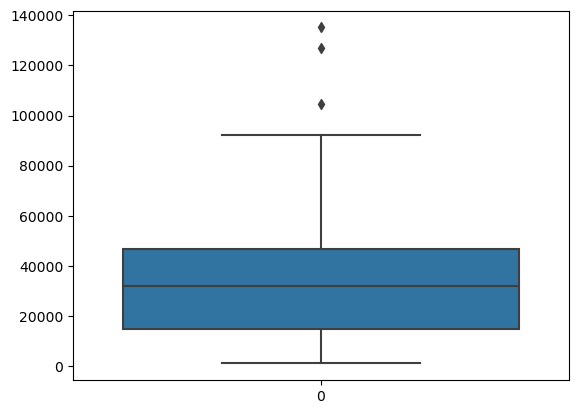

In [118]:
sns.boxplot(new_df['Kms_Driven'])

In [119]:
new_df = df3.copy()
new_df.loc[new_df['Kms_Driven']>upper_limit , 'Kms_Driven'] = upper_limit
new_df.loc[new_df['Kms_Driven']<lower_limit , 'Kms_Driven'] = lower_limit

<Axes: >

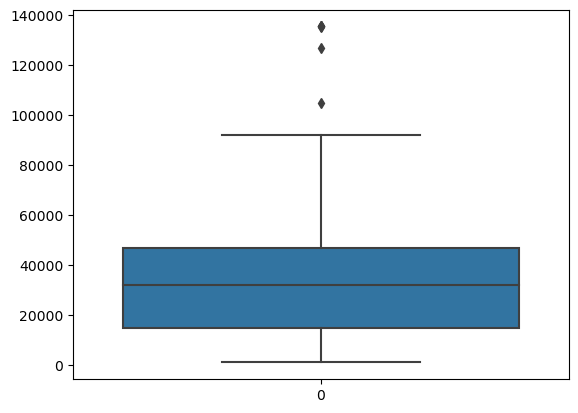

In [120]:
sns.boxplot(new_df['Kms_Driven'])

In [121]:
new_df['Kms_Driven'].nlargest(10)

84     135427.84
85     135427.84
179    135427.84
77     135154.00
37     127000.00
50     104707.00
200     92233.00
54      90000.00
79      89000.00
94      89000.00
Name: Kms_Driven, dtype: float64

In [122]:
upper_limit = new_df['Present_Price'].quantile(0.99)
lower_limit = new_df['Present_Price'].quantile(0.01)
upper_limit , lower_limit

(30.824000000000108, 0.5088)

<Axes: >

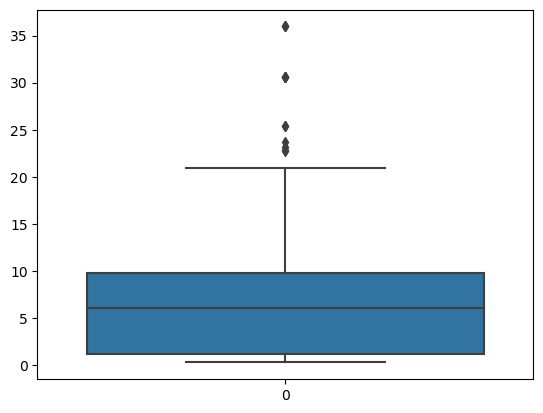

In [123]:
sns.boxplot(new_df['Present_Price'])

In [124]:
new_df['Present_Price'].nlargest(10)

59    35.96
62    35.96
63    35.96
50    30.61
51    30.61
79    30.61
93    30.61
82    25.39
96    25.39
85    23.73
Name: Present_Price, dtype: float64

In [125]:
new_df.loc[(new_df['Present_Price'] > upper_limit) | (new_df['Present_Price'] < lower_limit)]

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
59,2014,5,19.99,35.96,41000.0,3,2,3,0
62,2014,5,18.75,35.96,78000.0,3,2,3,0
63,2015,4,23.50,35.96,47000.0,3,2,3,0
181,2016,3,0.30,0.48,50000.0,2,3,2,0
183,2013,6,0.27,0.47,21000.0,2,3,2,0
195,2015,4,0.18,0.32,35000.0,2,3,2,0


In [126]:
new_df_1 = new_df.loc[(new_df['Present_Price']<upper_limit) & (new_df['Present_Price']>lower_limit)]
print('before removing outliers:',len(new_df))
print('after removing outliers:' , len(new_df_1))
print('outliers:',len(new_df)-len(new_df_1))

before removing outliers: 297
after removing outliers: 291
outliers: 6


<Axes: >

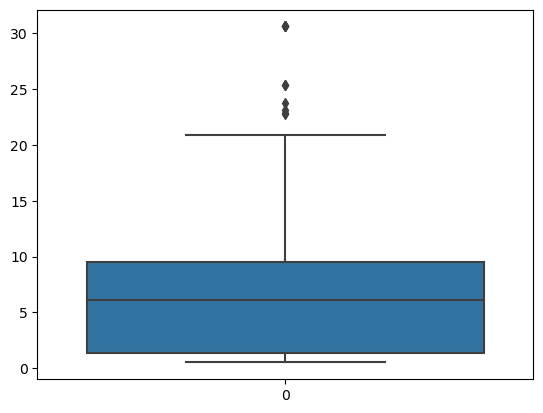

In [127]:
sns.boxplot(new_df_1['Present_Price'])

In [128]:
new_df_1 = new_df.copy()
new_df_1.loc[new_df_1['Present_Price']>upper_limit , 'Present_Price'] = upper_limit
new_df_1.loc[new_df_1['Present_Price']<lower_limit , 'Present_Price'] = lower_limit

<Axes: >

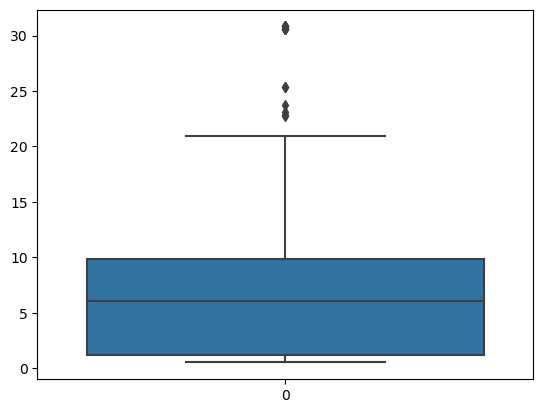

In [129]:
sns.boxplot(new_df_1['Present_Price'])

In [130]:
new_df_1['Present_Price'].nlargest(10)

59    30.824
62    30.824
63    30.824
50    30.610
51    30.610
79    30.610
93    30.610
82    25.390
96    25.390
85    23.730
Name: Present_Price, dtype: float64

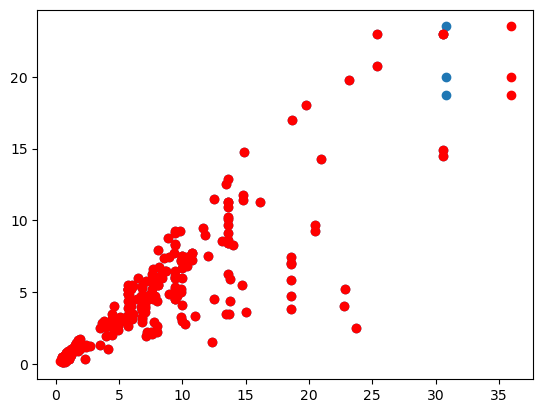

In [131]:
plt.scatter(new_df_1.Present_Price , new_df_1.Selling_Price)
plt.scatter(df3.Present_Price , df3.Selling_Price ,color='red')
plt.show()

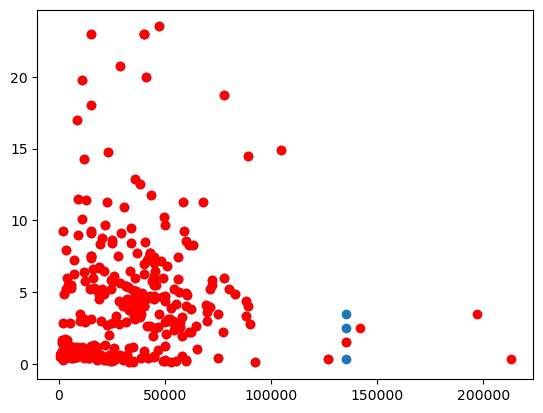

In [132]:
plt.scatter(new_df_1.Kms_Driven , new_df_1.Selling_Price)
plt.scatter(df3.Kms_Driven , df3.Selling_Price ,color='red')
plt.show()

## new model with new data

In [133]:
X = pd.DataFrame(new_df_1 , columns=[ 'Age',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner'])
Y = new_df_1['Selling_Price'].values.reshape(-1,1)

In [134]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [135]:
regressor = LinearRegression()

In [136]:
regressor.fit(x_train , y_train)

LinearRegression()

In [137]:
result = regressor.score(x_test,y_test)
print(result)

0.9030187116553974


In [138]:
kfold_validation = KFold(10 , shuffle=True)

In [139]:
results = cross_val_score(regressor , X , Y , cv=kfold_validation)

In [140]:
print(results)
print(np.mean(results))

[0.80562648 0.91402171 0.75947687 0.81402169 0.88865228 0.8709919
 0.53261211 0.79362219 0.89071664 0.82333068]
0.8093072543299303


## Integration of features

In [97]:
def dot_products(x):
    dot_products = []
    dot_products2 = []
    dot_products3 = []
    for i in range(len(x)):
        dot_product = np.dot(x['Present_Price'].iloc[i], x['Kms_Driven'].iloc[i])
        dot_products.append(dot_product)
        dot_product2 = np.dot(x['Present_Price'].iloc[i], x['Age'].iloc[i])
        dot_products2.append(dot_product2)
        dot_product3 = np.dot(x['Kms_Driven'].iloc[i], x['Age'].iloc[i])
        dot_products3.append(dot_product3)
    x['P_K'] = dot_products
    x['P_A'] = dot_products2
    x['K_A'] = dot_products3
    return x

In [141]:
dot_products(new_df_1)

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,2014,5,3.35,5.59,27000.0,2,2,2,0,150930.0,27.95,135000.0
1,2013,6,4.75,9.54,43000.0,3,2,2,0,410220.0,57.24,258000.0
2,2017,2,7.25,9.85,6900.0,2,2,2,0,67965.0,19.70,13800.0
3,2011,8,2.85,4.15,5200.0,2,2,2,0,21580.0,33.20,41600.0
4,2014,5,4.60,6.87,42450.0,3,2,2,0,291631.5,34.35,212250.0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,3,9.50,11.60,33988.0,3,2,2,0,394260.8,34.80,101964.0
297,2015,4,4.00,5.90,60000.0,2,2,2,0,354000.0,23.60,240000.0
298,2009,10,3.35,11.00,87934.0,2,2,2,0,967274.0,110.00,879340.0
299,2017,2,11.50,12.50,9000.0,3,2,2,0,112500.0,25.00,18000.0


## normalization

In [142]:
# Assuming df_dim is your DataFrame and you want to normalize the columns 'Present_Price', 'Age', and 'Kms_Driven'
columns_to_normalize = ['Present_Price', 'Age', 'Kms_Driven',
                        'Fuel_Type','Seller_Type','Transmission','Owner','P_K',
                        'P_A','K_A']

scaler = MinMaxScaler()
new_df_1[columns_to_normalize] = scaler.fit_transform(new_df_1[columns_to_normalize])
new_df_1

,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,2014,0.266667,3.35,0.167612,0.192259,0.0,0.0,0.0,0.0,0.046774,0.087586,0.065485
1,2013,0.333333,4.75,0.297910,0.311452,0.5,0.0,0.0,0.0,0.127472,0.182847,0.126078
2,2017,0.066667,7.25,0.308136,0.042522,0.0,0.0,0.0,0.0,0.020952,0.060754,0.005778
3,2011,0.466667,2.85,0.120111,0.029858,0.0,0.0,0.0,0.0,0.006516,0.104661,0.019473
4,2014,0.266667,4.60,0.209835,0.307355,0.5,0.0,0.0,0.0,0.090564,0.108401,0.103540
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,0.133333,9.50,0.365863,0.244316,0.5,0.0,0.0,0.0,0.122505,0.109864,0.049210
297,2015,0.200000,4.00,0.177838,0.438095,0.0,0.0,0.0,0.0,0.109975,0.073438,0.117211
298,2009,0.600000,3.35,0.346071,0.646191,0.0,0.0,0.0,0.0,0.300844,0.354441,0.432167
299,2017,0.066667,11.50,0.395551,0.058166,0.5,0.0,0.0,0.0,0.034813,0.077991,0.007847


In [143]:
X = pd.DataFrame(new_df_1, columns=[ 'Age',
 'Seller_Type',
 'P_K',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'P_A',
 'K_A',
 'Transmission',
 'Owner',])
Y =new_df_1['Selling_Price'].values.reshape(-1,1)

In [144]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [145]:
regressor = LinearRegression()

In [146]:
regressor.fit(x_train , y_train)

LinearRegression()

In [147]:
result = regressor.score(x_test,y_test)
print(result)

0.9638112064720493


In [148]:
kfold_validation = KFold(10 , shuffle=True)

In [149]:
results = cross_val_score(regressor , X , Y , cv=kfold_validation)

In [150]:
print(results)
print(results.mean())

[0.9701414  0.92930345 0.98414048 0.9834603  0.98206368 0.95661606
 0.94557162 0.89125262 0.98189042 0.95854281]
0.958298284607349


In [151]:
# A function to replace the negative effect
def replace(y_pred):
    # Iterate through the predicted values and replace any negative values with zero
    for i in range(len(y_pred)):
        if y_pred[i] < 0:
            y_pred[i] = 0
    return y_pred


In [152]:
y_pred = regressor.predict(x_test)
adjusted_values = replace(y_pred)
print(adjusted_values)

[[6.22513624e-01]
 [4.68917247e+00]
 [4.92667989e+00]
 [4.28875918e-01]
 [1.01290836e+01]
 [1.45175550e+01]
 [8.07545101e-01]
 [4.33321280e-01]
 [6.66810713e+00]
 [3.31629128e-01]
 [1.06835689e+01]
 [1.21502681e+01]
 [8.33485745e+00]
 [1.32710571e+00]
 [1.98418007e+00]
 [4.01909780e+00]
 [5.28318044e+00]
 [6.74770822e+00]
 [8.07281185e+00]
 [4.86732489e-02]
 [5.95006481e+00]
 [8.25555832e+00]
 [5.06896457e+00]
 [2.37981390e+00]
 [8.80629336e+00]
 [4.87032431e+00]
 [7.17496690e-01]
 [4.82432813e+00]
 [8.54298388e+00]
 [9.35517898e+00]
 [9.63014192e-01]
 [6.58148184e+00]
 [2.23250406e+00]
 [1.62062595e+00]
 [6.64719133e+00]
 [7.95637381e-01]
 [1.18790255e+00]
 [6.40792594e+00]
 [2.18624077e+01]
 [4.55010495e+00]
 [1.25432958e+00]
 [7.79687351e-01]
 [9.21445237e+00]
 [1.01542279e+01]
 [5.85204838e-01]
 [1.03714378e+01]
 [1.60461021e+00]
 [3.62489905e-01]
 [6.28252654e-02]
 [6.82254818e-01]
 [2.03270080e+01]
 [3.05196489e+00]
 [8.74478320e-01]
 [8.26091803e+00]
 [8.49588631e-03]
 [9.376044

In [153]:
print(regressor.intercept_)
print(regressor.coef_)
# 'Age',
#  'Seller_Type',
#  'P_K',
#  'Present_Price',
#  'Kms_Driven',
#  'Fuel_Type',
#  'P_A',
#  'K_A',
#  'Transmission',
#  'Owner'

[0.83462666]
[[  0.24416209  -0.27085815  -2.04461887  29.67561102  -3.37691801
    1.61878367 -21.10824593   4.8126256    0.41967085   0.27795942]]


In [154]:
print('mean absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 score:',metrics.r2_score(y_test,y_pred))

mean absolute error: 0.6179596013383956
mean squared error: 0.8511724505197831
root mean squared error: 0.9225900771847609
r2 score: 0.9638112064720493


In [155]:
result1=regressor.score(x_train, y_train) # returns the R² score for the training data
result2=regressor.score(x_test, y_test) # returns the R² score for the test data
print(result1)
print(result2)

0.9687732129189356
0.9638112064720493


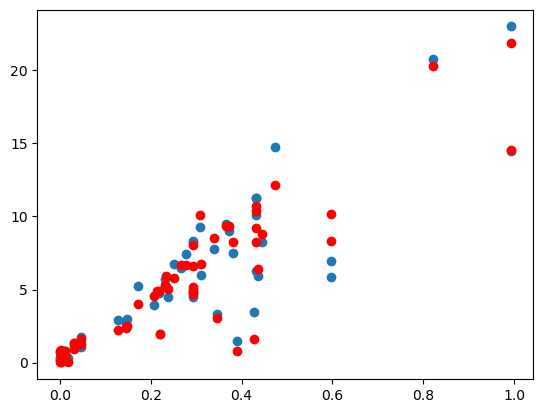

In [156]:
a = x_test.Present_Price
b = y_test
c = x_test.Present_Price
d = y_pred
plt.scatter(a , b)
plt.scatter(c , d , color='red')
plt.show()

In [157]:
x_test.insert(3 , "y_test" , y_test)
x_test.insert(4 , "y_pred" , y_pred)
x_test

,Age,Seller_Type,P_K,y_test,y_pred,Present_Price,Kms_Driven,Fuel_Type,P_A,K_A,Transmission,Owner
170,0.400000,1.0,0.001220,0.40,0.622514,0.010595,0.032093,0.0,0.015579,0.017946,0.0,0.000000
215,0.400000,0.0,0.105412,4.50,4.689172,0.293292,0.260050,0.0,0.210687,0.123467,0.0,0.000000
65,0.266667,0.0,0.097137,4.75,4.926680,0.212474,0.326351,0.5,0.109702,0.109821,0.0,0.000000
157,0.200000,1.0,0.005813,0.48,0.428876,0.010925,0.162460,0.0,0.007610,0.044302,0.0,0.000000
5,0.000000,0.0,0.006136,9.25,10.129084,0.307476,0.006548,0.5,0.028653,0.000000,0.0,0.000000
79,0.400000,0.0,0.847680,14.50,14.517555,0.992941,0.654132,0.5,0.693564,0.305887,1.0,0.000000
186,0.533333,1.0,0.003360,0.25,0.807545,0.000369,0.155011,0.0,0.011904,0.096520,1.0,0.000000
161,0.266667,1.0,0.005712,0.45,0.433321,0.010463,0.162460,0.0,0.010115,0.055632,0.0,0.000000
9,0.200000,0.0,0.117418,7.45,6.668107,0.277458,0.306736,0.5,0.112726,0.082464,0.0,0.000000
142,0.200000,1.0,0.007381,0.60,0.331629,0.010925,0.207158,0.0,0.007610,0.056125,0.0,0.000000


In [158]:
df3_1 = x_test.sort_values(by=['Present_Price'])
df3_1

,Age,Seller_Type,P_K,y_test,y_pred,Present_Price,Kms_Driven,Fuel_Type,P_A,K_A,Transmission,Owner
195,0.200000,1.0,0.005342,0.18,0.008496,0.000000,0.251855,0.0,0.003302,0.067948,0.0,0.000000
186,0.533333,1.0,0.003360,0.25,0.807545,0.000369,0.155011,0.0,0.011904,0.096520,1.0,0.000000
178,0.266667,1.0,0.002875,0.35,0.717497,0.000369,0.132662,0.0,0.005139,0.045779,1.0,0.000000
151,0.133333,1.0,0.005106,0.50,0.048673,0.001359,0.222057,0.0,0.002049,0.044794,0.0,0.000000
188,0.333333,1.0,0.002993,0.25,0.362490,0.002019,0.125212,0.0,0.007806,0.052184,0.0,0.000000
185,0.666667,1.0,0.000143,0.25,0.874478,0.002349,0.005274,0.0,0.017433,0.009276,1.0,0.000000
199,0.733333,1.0,0.009367,0.12,0.585205,0.002349,0.385948,0.0,0.019319,0.312291,0.0,0.000000
184,0.666667,1.0,0.005869,0.25,0.596022,0.007956,0.184809,0.0,0.023514,0.139871,0.0,0.333333
127,0.133333,1.0,0.001543,0.75,0.682255,0.009606,0.043267,0.0,0.004488,0.009325,0.0,0.000000
161,0.266667,1.0,0.005712,0.45,0.433321,0.010463,0.162460,0.0,0.010115,0.055632,0.0,0.000000


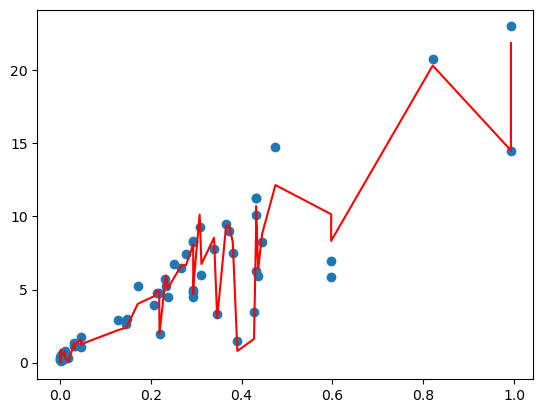

In [159]:
a = df3_1.Present_Price
b = df3_1.y_test
c = df3_1.Present_Price
d = df3_1.y_pred
plt.scatter(a,b)
plt.plot(c , d , color='red')
plt.show()

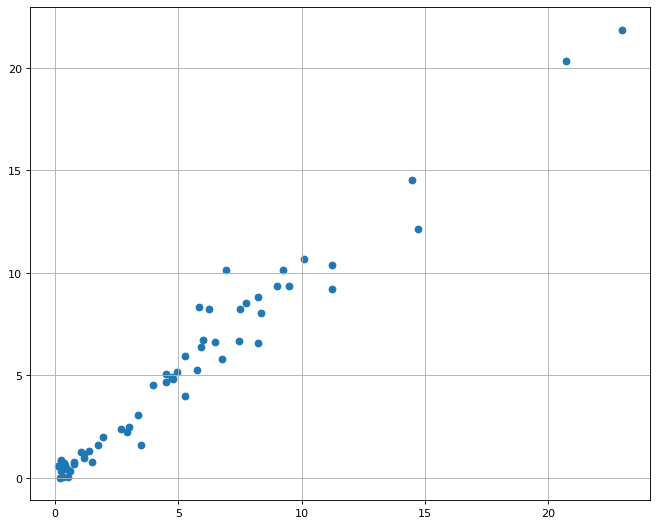

In [162]:
plt.figure(figsize=(10,8) , dpi=80)
plt.scatter(y_test , y_pred)
plt.grid()
plt.show()

In [163]:
compare = pd.DataFrame({'Actual':y_test.flatten() ,
                       'Predict':y_pred.flatten()})
compare

,Actual,Predict
0,0.40,0.622514
1,4.50,4.689172
2,4.75,4.926680
3,0.48,0.428876
4,9.25,10.129084
5,14.50,14.517555
6,0.25,0.807545
7,0.45,0.433321
8,7.45,6.668107
9,0.60,0.331629


## Create new data for test model

In [164]:
Df=pd.DataFrame({"Selling_Price":[5.425,8.88,15.89],
                "Age":[2,7,15] , "Present_Price":[13,11.23,12] , "Kms_Driven":[42000,69000,98934],
                "Fuel_Type":['Petrol','Diesel','Diesel'] , "Seller_Type":['Dealer','Individual','Dealer'],
                "Transmission":['Automatic','Manual','Manual'] , "Owner":['1','2','4']})

In [165]:
#Use the function to convert string to number
convert_numerical(Df)

,Selling_Price,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5.425,2,13.00,42000,2,2,3,1
1,8.880,7,11.23,69000,3,3,2,2
2,15.890,15,12.00,98934,3,2,2,4


In [166]:
#Use the function to create P_K , P_A , K_A
dot_products(Df)

,Selling_Price,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,5.425,2,13.00,42000,2,2,3,1,546000.0,26.00,84000
1,8.880,7,11.23,69000,3,3,2,2,774870.0,78.61,483000
2,15.890,15,12.00,98934,3,2,2,4,1187208.0,180.00,1484010


In [168]:
columns_to_normalize = ['Present_Price', 'Age' , 'Kms_Driven',
                            'Fuel_Type','Seller_Type','Transmission','Owner',
                            'P_K','P_A','K_A']

Df[columns_to_normalize] = scaler.transform(Df[columns_to_normalize])
Df

,Selling_Price,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,5.425,0.066667,0.412044,0.304002,0.0,0.0,1.0,0.333333,0.169731,0.081244,0.040361
1,8.880,0.400000,0.353658,0.505141,0.5,1.0,0.0,0.666667,0.240962,0.252350,0.236919
2,15.890,0.933333,0.379057,0.728136,0.5,0.0,0.0,1.333333,0.369294,0.582106,0.730045


In [170]:
Df_1 = new_df_1.append(Df)
Df_1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22812\4126137743.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Df_1 = new_df_1.append(Df)


,Year,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,2014.0,0.266667,3.350,0.167612,0.192259,0.0,0.0,0.0,0.000000,0.046774,0.087586,0.065485
1,2013.0,0.333333,4.750,0.297910,0.311452,0.5,0.0,0.0,0.000000,0.127472,0.182847,0.126078
2,2017.0,0.066667,7.250,0.308136,0.042522,0.0,0.0,0.0,0.000000,0.020952,0.060754,0.005778
3,2011.0,0.466667,2.850,0.120111,0.029858,0.0,0.0,0.0,0.000000,0.006516,0.104661,0.019473
4,2014.0,0.266667,4.600,0.209835,0.307355,0.5,0.0,0.0,0.000000,0.090564,0.108401,0.103540
...,...,...,...,...,...,...,...,...,...,...,...,...
299,2017.0,0.066667,11.500,0.395551,0.058166,0.5,0.0,0.0,0.000000,0.034813,0.077991,0.007847
300,2016.0,0.133333,5.300,0.177838,0.031825,0.0,0.0,0.0,0.000000,0.009833,0.054249,0.007055
0,NaN,0.066667,5.425,0.412044,0.304002,0.0,0.0,1.0,0.333333,0.169731,0.081244,0.040361
1,NaN,0.400000,8.880,0.353658,0.505141,0.5,1.0,0.0,0.666667,0.240962,0.252350,0.236919


In [172]:
Df_1.drop(columns=["Year"] , inplace=True)
Df_1

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,0.266667,3.350,0.167612,0.192259,0.0,0.0,0.0,0.000000,0.046774,0.087586,0.065485
1,0.333333,4.750,0.297910,0.311452,0.5,0.0,0.0,0.000000,0.127472,0.182847,0.126078
2,0.066667,7.250,0.308136,0.042522,0.0,0.0,0.0,0.000000,0.020952,0.060754,0.005778
3,0.466667,2.850,0.120111,0.029858,0.0,0.0,0.0,0.000000,0.006516,0.104661,0.019473
4,0.266667,4.600,0.209835,0.307355,0.5,0.0,0.0,0.000000,0.090564,0.108401,0.103540
...,...,...,...,...,...,...,...,...,...,...,...
299,0.066667,11.500,0.395551,0.058166,0.5,0.0,0.0,0.000000,0.034813,0.077991,0.007847
300,0.133333,5.300,0.177838,0.031825,0.0,0.0,0.0,0.000000,0.009833,0.054249,0.007055
0,0.066667,5.425,0.412044,0.304002,0.0,0.0,1.0,0.333333,0.169731,0.081244,0.040361
1,0.400000,8.880,0.353658,0.505141,0.5,1.0,0.0,0.666667,0.240962,0.252350,0.236919


In [174]:
train = Df_1.iloc[:297]
test = Df_1.iloc[297:]

In [175]:
train

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,0.266667,3.35,0.167612,0.192259,0.0,0.0,0.0,0.0,0.046774,0.087586,0.065485
1,0.333333,4.75,0.297910,0.311452,0.5,0.0,0.0,0.0,0.127472,0.182847,0.126078
2,0.066667,7.25,0.308136,0.042522,0.0,0.0,0.0,0.0,0.020952,0.060754,0.005778
3,0.466667,2.85,0.120111,0.029858,0.0,0.0,0.0,0.0,0.006516,0.104661,0.019473
4,0.266667,4.60,0.209835,0.307355,0.5,0.0,0.0,0.0,0.090564,0.108401,0.103540
...,...,...,...,...,...,...,...,...,...,...,...
296,0.133333,9.50,0.365863,0.244316,0.5,0.0,0.0,0.0,0.122505,0.109864,0.049210
297,0.200000,4.00,0.177838,0.438095,0.0,0.0,0.0,0.0,0.109975,0.073438,0.117211
298,0.600000,3.35,0.346071,0.646191,0.0,0.0,0.0,0.0,0.300844,0.354441,0.432167
299,0.066667,11.50,0.395551,0.058166,0.5,0.0,0.0,0.0,0.034813,0.077991,0.007847


In [176]:
test

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,P_K,P_A,K_A
0,0.066667,5.425,0.412044,0.304002,0.0,0.0,1.0,0.333333,0.169731,0.081244,0.040361
1,0.400000,8.880,0.353658,0.505141,0.5,1.0,0.0,0.666667,0.240962,0.252350,0.236919
2,0.933333,15.890,0.379057,0.728136,0.5,0.0,0.0,1.333333,0.369294,0.582106,0.730045


## finally model

In [177]:
x_train = Df_1[["Age","Present_Price","Kms_Driven",
                "Fuel_Type","Seller_Type","Transmission",
                "Owner","P_K","P_A","K_A"]][:297]
y_train = Df_1[["Selling_Price"]][:297].values.reshape(-1,1)

In [178]:
x_test = Df_1[["Age","Present_Price","Kms_Driven",
               "Fuel_Type","Seller_Type","Transmission","Owner",
               "P_K","P_A","K_A"]][297:]

In [179]:
regressor.fit(x_train,y_train)

LinearRegression()

In [180]:
y_pred = regressor.predict(x_test)

In [181]:
print(y_pred)

[[10.66561627]
 [ 5.73391062]
 [ 1.67557913]]


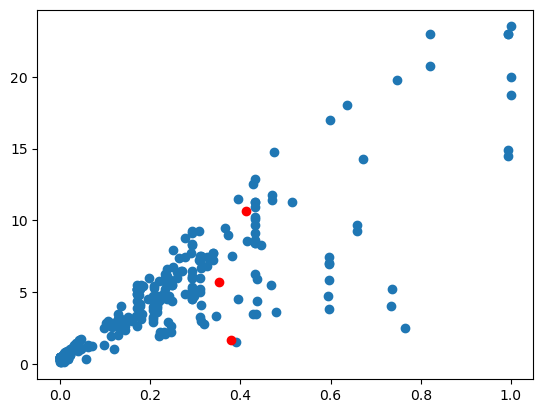

In [182]:
a = x_train.Present_Price
b = y_train
c = x_test.Present_Price
d = y_pred
plt.scatter(a , b)
plt.scatter(c , d , color='red')
plt.show()

In [ ]:
#  'Age',
#  'Seller_Type',
#  'dot_product',
#  'Present_Price',
#  'Kms_Driven',
#  'Fuel_Type',
#  'dot_product2',
#  'dot_product3',
#  'Transmission',
#  'Owner',
# [0.83462666]
# [[  0.24416209  -0.27085815  -2.04461887  29.67561102  -3.37691801
#     1.61878367 -21.10824593   4.8126256    0.41967085   0.27795942]

In [188]:
def calculate_model_output(Age, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, P_K, P_A, K_A):
    output = 0.83462666 + (0.24416209*Age) + (29.67561102*Present_Price) + (-3.37691801*Kms_Driven)+ (1.61878367*Fuel_Type) + (-0.27085815*Seller_Type) + (0.41967085*Transmission) +(0.27795942*Owner) + (-2.04461887*P_K) + (-21.10824593*P_A) + (4.8126256*K_A)
    return output


def preprocess_data(df):
    Fuel_numeric = {'Petrol': 2, 'Diesel': 3, 'CNG': 4}
    df['Fuel_Type'] = df['Fuel_Type'].replace(Fuel_numeric)
    Seller_numeric = {'Dealer': 2, 'Individual': 3}
    df['Seller_Type'] = df['Seller_Type'].replace(Seller_numeric)
    Transmission_numeric = {'Manual': 2, 'Automatic': 3}
    df['Transmission'] = df['Transmission'].replace(Transmission_numeric)

    dot_products = []
    dot_products2 = []
    dot_products3 = []
    for i in range(len(df)):
        dot_product = np.dot(df['Present_Price'].iloc[i], df['Kms_Driven'].iloc[i])
        dot_products.append(dot_product)
        dot_product2 = np.dot(df['Present_Price'].iloc[i], df['Age'].iloc[i])
        dot_products2.append(dot_product2)
        dot_product3 = np.dot(df['Kms_Driven'].iloc[i], df['Age'].iloc[i])
        dot_products3.append(dot_product3)
    df['P_K'] = dot_products
    df['P_A'] = dot_products2
    df['K_A'] = dot_products3

    columns_to_normalize = ['Present_Price', 'Age', 'Kms_Driven', 'Fuel_Type',
                            'Seller_Type', 'Transmission', 'Owner',
                            'P_K', 'P_A', 'K_A']
    df[columns_to_normalize] = scaler.transform(df[columns_to_normalize])
    return df


Age = int(input("The age of the car you want is:"))
Present_Price = float(input("Price previously purchased by another person:"))
Kms_Driven = float(input("Kilometers traveled by that car:"))
Fuel_Type = input("Type of car fuel consumption:(Petrol/Diesel/CNG)")
Seller_Type = input("Tells if a seller is Individual or a Dealer:")
Transmission = input("Gear transmission of the car:(Automatic/Manual)")
Owner = int(input("Number of previous owners of the car:"))

# Preprocess the input data
input_data = pd.DataFrame({
    'Age': [Age],
    'Present_Price': [Present_Price],
    'Kms_Driven': [Kms_Driven],
    'Fuel_Type': [Fuel_Type],
    'Seller_Type': [Seller_Type],
    'Transmission': [Transmission],
    'Owner': [Owner]
})
preprocessed_data = preprocess_data(input_data)

# Calculate the model output using the preprocessed data
output = calculate_model_output(preprocessed_data['Age'], preprocessed_data['Present_Price'], preprocessed_data['Kms_Driven'],
                                preprocessed_data['Fuel_Type'], preprocessed_data['Seller_Type'], preprocessed_data['Transmission'],
                                preprocessed_data['Owner'], preprocessed_data['P_K'], preprocessed_data['P_A'],
                                preprocessed_data['K_A'])
print("Price:",output.values[0])

The age of the car you want is:2
Price previously purchased by another person:38.96
Kilometers traveled by that car:27000
Type of car fuel consumption:(Petrol/Diesel/CNG)Diesel
Tells if a seller is Individual or a Dealer:Individual
Gear transmission of the car:(Automatic/Manual)Manual
Number of previous owners of the car:0
Price: 32.55500053214636
